## About

Using Linear Regression to predict median house prices in California. 

## Data Preparation

In [1]:
# Import necessary libraries

## Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [2]:
#Import data
df = pd.read_csv('housing.csv')

#Check data size
df.shape

(20640, 10)

## Exploratory Data Analysis

In [3]:
#View data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

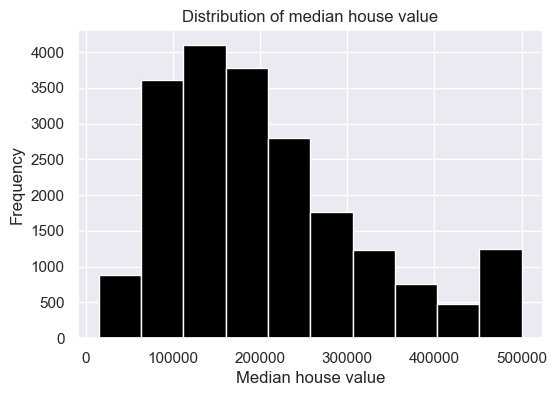

In [6]:
# Distribution plot
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=10, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Median house value')
plt.title('Distribution of median house value')

plt.show()

### Using only a subset of the data as requested for homework

In [7]:
# Instructions : First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

In [8]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
sub_df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [10]:
sub_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [11]:
sub_df.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [12]:
#Next, use only the following columns:'latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
#'population','households','median_income','median_house_value'

In [13]:
sub_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [14]:
columns_required = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                    'population', 'households', 'median_income', 'median_house_value']

sub_df = sub_df[columns_required]

In [15]:
sub_df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [16]:
sub_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


### Question 1

There's one feature with missing values. What is it?

In [17]:
sub_df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'population'?

In [18]:
percentiles = sub_df['population'].quantile([0.25, 0.5, 0.75])

# Print the median (50% percentile)
print("50th Percentile (Median):", percentiles[0.5])


50th Percentile (Median): 1195.0


##### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [19]:
np.random.seed(42)

data = sub_df

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [21]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [22]:
# Fills missing values with 0.

X_train = df_train.fillna(0).values
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

print("Filled data with zero: RMSE train data:", round(rmse(y_train, y_pred), 2))

X_val = df_val.fillna(0).values
y_pred = w_0 + X_val.dot(w)

print("Filled data with zero: RMSE validation data:", round(rmse(y_val, y_pred), 2))

Filled data with zero: RMSE train data: 0.34
Filled data with zero: RMSE validation data: 0.34


In [23]:
# Fills missing values with the mean of this variable.
mean_total_bedrooms = data['total_bedrooms'].mean()

X_train = df_train.fillna(mean_total_bedrooms).values
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

print("Filled data with mean: RMSE train data:", round(rmse(y_train, y_pred), 2))

X_val = df_val.fillna(mean_total_bedrooms).values
y_pred = w_0 + X_val.dot(w)

print("Filled data with mean: RMSE validation data:", round(rmse(y_val, y_pred), 2))

Filled data with mean: RMSE train data: 0.34
Filled data with mean: RMSE validation data: 0.34


### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [24]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [25]:
# List of regularization parameters to try
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]


best_rmse = float('inf') 
best_r = None


for r in r_values:
    # Train a linear regression model with the current r value on the training data
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    # Make predictions on the validation set
    y_pred_val = w_0 + X_val.dot(w)

    # Calculate the RMSE on the validation set
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # Print the RMSE for the current r value (rounded to 2 decimal places)
    print(f"RMSE with r={r}: {round(rmse_val, 2)}")

    # Update the best RMSE and corresponding r value if the current RMSE is better
    if rmse_val < best_rmse:
        best_rmse = rmse_val
        best_r = r

# Print the best r value and the corresponding best RMSE
print(f"Best r: {best_r}")
print(f"Best RMSE: {round(best_rmse, 2)}")


RMSE with r=0: 0.34
RMSE with r=1e-06: 0.34
RMSE with r=0.0001: 0.34
RMSE with r=0.001: 0.34
RMSE with r=0.01: 0.34
RMSE with r=0.1: 0.34
RMSE with r=1: 0.34
RMSE with r=5: 0.35
RMSE with r=10: 0.35
Best r: 0
Best RMSE: 0.34


### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
- What's the value of std?

In [26]:
n = len(data)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

def split_data_with_seed(seed=42):
    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = data.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, y_train, df_val, y_val, df_test, y_test

In [27]:
rmse_scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, y_train, df_val, y_val, _, _ = split_data_with_seed(seed)
    
    X_train = df_train.fillna(0).values
    X_val = df_val.fillna(0).values
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    
    rmse = np.sqrt(((y_pred - y_val) ** 2).mean())
    
    rmse_scores.append(rmse)

std_deviation = np.std(rmse_scores)

rounded_std_deviation = round(std_deviation, 3)

# Print the result
print("Standard Deviation of RMSE Scores:", rounded_std_deviation)


Standard Deviation of RMSE Scores: 0.005


### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [28]:
df_train, y_train, df_val, y_val, df_test, y_test = split_data_with_seed(9)
df_train_combined = pd.concat([df_train, df_val])
y_train = np.concatenate((y_train, y_val), axis=0)

X_train = df_train_combined.fillna(0).values
X_test = df_test.fillna(0).values
r = 0.001

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
y_pred = w_0 + X_test.dot(w)


In [29]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE on the test dataset
print("RMSE on the Test Dataset:", rmse_test)


RMSE on the Test Dataset: 0.3349899336606094
